In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

<a id='item1'></a>

## 1. Download and Explore Dataset

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

Luckily, this dataset exists for free on the web. Feel free to try to find this dataset on your own, but here is the link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

For your convenience, I downloaded the files and placed it on the server, so you can simply run a `wget` command and access the data. So let's go ahead and do that.

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


#### Load and explore the data

Next, let's load the data.

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [5]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [8]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [10]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [12]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [13]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [14]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [15]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(manhattan_data['Borough'].unique()),
        manhattan_data.shape[0]
    )
)

The dataframe has 1 boroughs and 40 neighborhoods.


Let's get the geographical coordinates of Manhattan.

In [16]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


As we did with all of New York City, let's visualizat Manhattan the neighborhoods in it.

In [17]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [18]:
CLIENT_ID = '35EKZ3FSZADJXJN2LG1LSI5SSAO2OEBMB5XDO5ZDRSPNVGF2' # your Foursquare ID
CLIENT_SECRET = 'SZHLFCJV0WV33CXJK45ODDNNCP1OZLZLCIMHFHWMONLOBTQC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 35EKZ3FSZADJXJN2LG1LSI5SSAO2OEBMB5XDO5ZDRSPNVGF2
CLIENT_SECRET:SZHLFCJV0WV33CXJK45ODDNNCP1OZLZLCIMHFHWMONLOBTQC


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [19]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

Get the neighborhood's latitude and longitude values.

In [20]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [21]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL




'https://api.foursquare.com/v2/venues/explore?&client_id=35EKZ3FSZADJXJN2LG1LSI5SSAO2OEBMB5XDO5ZDRSPNVGF2&client_secret=SZHLFCJV0WV33CXJK45ODDNNCP1OZLZLCIMHFHWMONLOBTQC&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

Double-click __here__ for the solution.
<!-- The correct answer is:
LIMIT = 100 # limit of number of venues returned by Foursquare API
-->

<!--
radius = 500 # define radius
-->

<!--
\\ # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
--> 

Send the GET request and examine the resutls

In [22]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee4c9b34d47d02a2dfe06ba'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 25,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Starbucks,Coffee Shop,40.877531,-73.905582
4,Dunkin',Donut Shop,40.877136,-73.906666


And how many venues were returned by Foursquare?

In [25]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


<a id='item2'></a>

## 2. Explore Neighborhoods in Manhattan

#### Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *manhattan_venues*.

In [27]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


Double-click __here__ for the solution.
<!-- The correct answer is:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )
--> 

#### Let's check the size of the resulting dataframe

In [28]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3132, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


Let's check how many venues were returned for each neighborhood

In [29]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,65,65,65,65,65,65
Carnegie Hill,87,87,87,87,87,87
Central Harlem,45,45,45,45,45,45
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,99,99,99,99,99,99
Clinton,100,100,100,100,100,100
East Harlem,40,40,40,40,40,40
East Village,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues

In [30]:
#print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))
manhattan_venues['Venue Category'].unique()

array(['Pizza Place', 'Yoga Studio', 'Diner', 'Coffee Shop', 'Donut Shop',
       'Pharmacy', 'Tennis Stadium', 'Seafood Restaurant', 'Gym',
       'Sandwich Place', 'Supplement Shop', 'Steakhouse',
       'Department Store', 'American Restaurant', 'Ice Cream Shop',
       'Discount Store', 'Video Game Store', 'Bank', 'Kids Store',
       'Miscellaneous Shop', 'Deli / Bodega', 'Greek Restaurant', 'Hotel',
       'Spa', 'Bakery', 'Cocktail Bar', 'Museum', 'English Restaurant',
       'Tea Room', 'Hotpot Restaurant', 'New American Restaurant',
       'Indie Movie Theater', 'Roof Deck', 'Spanish Restaurant',
       'Chinese Restaurant', 'Noodle House', 'Salon / Barbershop',
       'Bike Shop', 'Historic Site', 'Asian Restaurant', 'Boutique',
       'Karaoke Bar', 'Thai Restaurant', 'Music Venue', 'Cosmetics Shop',
       'Organic Grocery', 'Bubble Tea Shop', 'Malay Restaurant',
       'Supermarket', 'Snack Place', 'Vietnamese Restaurant',
       'Jewelry Store', 'Paper / Office Supplies S

<a id='item3'></a>

## 3. Analyze Each Neighborhood

In [31]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Sk

And let's examine the new dataframe size.

In [32]:
manhattan_onehot.shape

(3132, 332)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [33]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Sk

#### Let's confirm the new size

In [34]:
manhattan_grouped.shape

(40, 332)

#### Let's print each neighborhood along with the top 5 most common venues

In [35]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.12
1          Hotel  0.06
2    Coffee Shop  0.05
3  Memorial Site  0.05
4            Gym  0.05


----Carnegie Hill----
         venue  freq
0  Coffee Shop  0.09
1         Café  0.05
2  Yoga Studio  0.03
3    Bookstore  0.03
4    Wine Shop  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1   Chinese Restaurant  0.04
2                  Bar  0.04
3  American Restaurant  0.04
4   Seafood Restaurant  0.04


----Chelsea----
            venue  freq
0     Coffee Shop  0.08
1     Art Gallery  0.07
2  Ice Cream Shop  0.04
3          Bakery  0.03
4            Café  0.03


----Chinatown----
                venue  freq
0  Chinese Restaurant  0.07
1     Bubble Tea Shop  0.04
2              Bakery  0.04
3        Cocktail Bar  0.04
4                 Bar  0.03


----Civic Center----
                 venue  freq
0          Coffee Shop  0.06
1                Hotel  0.05
2         Cocktail Bar  0.0

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Memorial Site,Gym,Coffee Shop,Playground,Food Court,Mexican Restaurant,Shopping Mall,Gourmet Shop
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Bookstore,Gym / Fitness Center,Gym,Italian Restaurant,Pizza Place,Wine Shop,Vietnamese Restaurant
2,Central Harlem,African Restaurant,Seafood Restaurant,Gym / Fitness Center,American Restaurant,Bar,French Restaurant,Chinese Restaurant,Café,Boutique,Market
3,Chelsea,Coffee Shop,Art Gallery,Ice Cream Shop,Café,American Restaurant,Bakery,Pizza Place,Cocktail Bar,Market,Seafood Restaurant
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Bubble Tea Shop,Coffee Shop,Optical Shop,Bar,Spa,American Restaurant,Ice Cream Shop


<a id='item4'></a>

## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [38]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 2, 2, 1, 1, 1, 3, 2, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [39]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Pharmacy,Supplement Shop,Steakhouse,Seafood Restaurant,Pizza Place,Deli / Bodega
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Bakery,Cocktail Bar,Bubble Tea Shop,Coffee Shop,Optical Shop,Bar,Spa,American Restaurant,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Café,Bakery,Deli / Bodega,Mobile Phone Shop,Chinese Restaurant,Grocery Store,Mexican Restaurant,Bank,Spanish Restaurant,Pizza Place
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Bakery,Café,Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant,Caribbean Restaurant,Chinese Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Pizza Place,Mexican Restaurant,Coffee Shop,Deli / Bodega,Café,Sushi Restaurant,Bakery,Cocktail Bar,Yoga Studio,Chinese Restaurant


Finally, let's visualize the resulting clusters

In [40]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 5. Examine Clusters

Examine the clusters to come with the count of Restaurants in each cluster

#### Cluster 1

In [41]:
C1 = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

In [42]:
C1_data = C1.set_index('Neighborhood')
C1_data
C1_Count=C1_data.transpose()
C1_Count

Neighborhood,Roosevelt Island,Battery Park City,Stuyvesant Town
1st Most Common Venue,Park,Park,Boat or Ferry
2nd Most Common Venue,Deli / Bodega,Hotel,Park
3rd Most Common Venue,Dog Run,Memorial Site,Playground
4th Most Common Venue,Coffee Shop,Gym,Heliport
5th Most Common Venue,Greek Restaurant,Coffee Shop,Fountain
6th Most Common Venue,Outdoors & Recreation,Playground,Farmers Market
7th Most Common Venue,Monument / Landmark,Food Court,Skating Rink
8th Most Common Venue,Sandwich Place,Mexican Restaurant,Gas Station
9th Most Common Venue,Liquor Store,Shopping Mall,Bistro
10th Most Common Venue,Dry Cleaner,Gourmet Shop,Bar


In [44]:
C1_result = []
for (columnName, columnData) in C1_Count.iteritems():
    if C1_Count[C1_Count[columnName].str.contains('Restaurant',na=False)].groupby(columnName).size().apply(lambda x: 1).sum()<1:
        C1_result.append(columnName)
C1_Correct_Table = C1_Count.drop(C1_result,axis=1)
C1_Correct_Table.reset_index(drop=True, inplace=True)
C1_Correct_Table.index.name
C1_Correct_Table.head()


Neighborhood,Roosevelt Island,Battery Park City
0,Park,Park
1,Deli / Bodega,Hotel
2,Dog Run,Memorial Site
3,Coffee Shop,Gym
4,Greek Restaurant,Coffee Shop


In [54]:
C1_Column_name = []
C1_Column_name = C1_Correct_Table.columns
C1_Restaurant_Count = []
for (C1columnName, C1columnData) in C1_Correct_Table.iteritems():
    C1_Restaurant_Count.append(C1_Correct_Table[C1_Correct_Table[C1columnName].str.contains('Restaurant',na=False)].groupby(C1columnName).size().apply(lambda x: 1).sum())
df_C1 = pd.DataFrame([C1_Restaurant_Count], columns=C1_Column_name)
C1_Dataframe = df_C1.transpose()
C1_Dataframe.insert(1, "Cluster", ['1','1'], True)
C1_Dataframe

,0,Cluster
Neighborhood,,
Roosevelt Island,1,1
Battery Park City,1,1


There are only 2 restaurants in cluster 1. Likewise we examine other clusters

#### Cluster 2

In [55]:
C2 = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

In [56]:
C2_data = C2.set_index('Neighborhood')
C2_data
C2_Count=C2_data.transpose()
C2_Count

Neighborhood,Chinatown,Clinton,Midtown,Murray Hill,Lower East Side,Little Italy,Morningside Heights,Civic Center,Midtown South
1st Most Common Venue,Chinese Restaurant,Theater,Hotel,Hotel,Chinese Restaurant,Spa,Park,Coffee Shop,Korean Restaurant
2nd Most Common Venue,Bakery,Coffee Shop,Coffee Shop,Sandwich Place,Bakery,Bubble Tea Shop,Coffee Shop,Hotel,Hotel
3rd Most Common Venue,Cocktail Bar,Italian Restaurant,Theater,Pizza Place,Café,Mediterranean Restaurant,American Restaurant,Cocktail Bar,Dessert Shop
4th Most Common Venue,Bubble Tea Shop,Gym / Fitness Center,Bakery,Japanese Restaurant,Ramen Restaurant,Italian Restaurant,Bookstore,Spa,Burger Joint
5th Most Common Venue,Coffee Shop,Hotel,Clothing Store,Coffee Shop,Art Gallery,Ice Cream Shop,Burger Joint,Park,Coffee Shop
6th Most Common Venue,Optical Shop,Gym,Sushi Restaurant,Gym / Fitness Center,Coffee Shop,Pizza Place,Sandwich Place,American Restaurant,Japanese Restaurant
7th Most Common Venue,Bar,Cocktail Bar,Japanese Restaurant,Mediterranean Restaurant,Cocktail Bar,Bakery,Deli / Bodega,Gym / Fitness Center,Café
8th Most Common Venue,Spa,Wine Shop,Cuban Restaurant,Deli / Bodega,Yoga Studio,Salon / Barbershop,Donut Shop,French Restaurant,American Restaurant
9th Most Common Venue,American Restaurant,Thai Restaurant,Pizza Place,Bar,Clothing Store,Café,Seafood Restaurant,Café,Gym / Fitness Center
10th Most Common Venue,Ice Cream Shop,American Restaurant,Mediterranean Restaurant,Chinese Restaurant,French Restaurant,Sandwich Place,Tennis Court,Sporting Goods Shop,Hotel Bar


In [57]:
C2_result = []
for (C2columnName, C2columnData) in C2_Count.iteritems():
    if C2_Count[C2_Count[C2columnName].str.contains('Restaurant',na=False)].groupby(C2columnName).size().apply(lambda x: 1).sum()<1:
        C2_result.append(C2columnName)
C2_Correct_Table = C2_Count.drop(C2_result,axis=1)
C2_Correct_Table.reset_index(drop=True, inplace=True)
C2_Correct_Table.index.name
C2_Correct_Table.head()


Neighborhood,Chinatown,Clinton,Midtown,Murray Hill,Lower East Side,Little Italy,Morningside Heights,Civic Center,Midtown South
0,Chinese Restaurant,Theater,Hotel,Hotel,Chinese Restaurant,Spa,Park,Coffee Shop,Korean Restaurant
1,Bakery,Coffee Shop,Coffee Shop,Sandwich Place,Bakery,Bubble Tea Shop,Coffee Shop,Hotel,Hotel
2,Cocktail Bar,Italian Restaurant,Theater,Pizza Place,Café,Mediterranean Restaurant,American Restaurant,Cocktail Bar,Dessert Shop
3,Bubble Tea Shop,Gym / Fitness Center,Bakery,Japanese Restaurant,Ramen Restaurant,Italian Restaurant,Bookstore,Spa,Burger Joint
4,Coffee Shop,Hotel,Clothing Store,Coffee Shop,Art Gallery,Ice Cream Shop,Burger Joint,Park,Coffee Shop


In [58]:
C2_Column_name = []
C2_Column_name = C2_Correct_Table.columns
C2_Restaurant_Count = []
for (C2columnName, C2columnData) in C2_Correct_Table.iteritems():
    C2_Restaurant_Count.append(C2_Correct_Table[C2_Correct_Table[C2columnName].str.contains('Restaurant',na=False)].groupby(C2columnName).size().apply(lambda x: 1).sum())
df_C2 = pd.DataFrame([C2_Restaurant_Count], columns=C2_Column_name)
C2_Dataframe = df_C2.transpose()
C2_Dataframe.insert(1, "Cluster", ['2','2','2','2','2','2','2','2','2'], True)
C2_Dataframe

,0,Cluster
Neighborhood,,
Chinatown,2,2
Clinton,3,2
Midtown,4,2
Murray Hill,3,2
Lower East Side,3,2
Little Italy,2,2
Morningside Heights,2,2
Civic Center,2,2
Midtown South,3,2


#### Cluster 3

In [59]:
C3 = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

In [60]:
C3_data = C3.set_index('Neighborhood')
C3_data
C3_Count=C3_data.transpose()
C3_Count

Neighborhood,Manhattanville,Central Harlem,Upper East Side,Yorkville,Lenox Hill,Upper West Side,Lincoln Square,Chelsea,Greenwich Village,East Village,Tribeca,Soho,West Village,Manhattan Valley,Gramercy,Financial District,Carnegie Hill,Noho,Sutton Place,Turtle Bay,Flatiron,Hudson Yards
1st Most Common Venue,Coffee Shop,African Restaurant,Italian Restaurant,Coffee Shop,Coffee Shop,Bar,Plaza,Coffee Shop,Italian Restaurant,Mexican Restaurant,Park,Italian Restaurant,Italian Restaurant,Coffee Shop,Bar,Coffee Shop,Coffee Shop,Pizza Place,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Hotel
2nd Most Common Venue,Seafood Restaurant,Seafood Restaurant,Coffee Shop,Gym,Pizza Place,Italian Restaurant,Italian Restaurant,Art Gallery,Café,Bar,American Restaurant,Coffee Shop,Wine Bar,Yoga Studio,Coffee Shop,Pizza Place,Café,Coffee Shop,Gym / Fitness Center,Coffee Shop,Mediterranean Restaurant,Italian Restaurant
3rd Most Common Venue,Park,Gym / Fitness Center,Gym / Fitness Center,Italian Restaurant,Italian Restaurant,Dessert Shop,Café,Ice Cream Shop,Sushi Restaurant,Coffee Shop,Italian Restaurant,Sandwich Place,American Restaurant,Pizza Place,Pizza Place,Hotel,Yoga Studio,Grocery Store,Italian Restaurant,Park,Café,American Restaurant
4th Most Common Venue,Bakery,American Restaurant,Bakery,Bar,Sushi Restaurant,Wine Bar,Gym / Fitness Center,Café,Burger Joint,Cocktail Bar,Wine Bar,Mediterranean Restaurant,Pizza Place,Mexican Restaurant,Bagel Shop,American Restaurant,Bookstore,Japanese Restaurant,Park,Café,Italian Restaurant,Gym / Fitness Center
5th Most Common Venue,Mexican Restaurant,Bar,Yoga Studio,Sushi Restaurant,Café,Indian Restaurant,Theater,American Restaurant,Spa,Speakeasy,Greek Restaurant,Clothing Store,Park,Bar,Mexican Restaurant,Italian Restaurant,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Sushi Restaurant,Coffee Shop,Café
6th Most Common Venue,Chinese Restaurant,French Restaurant,French Restaurant,Pizza Place,Cocktail Bar,Middle Eastern Restaurant,Performing Arts Venue,Bakery,Comedy Club,Ice Cream Shop,Spa,Spa,Jazz Club,Park,Italian Restaurant,Café,Gym,Sushi Restaurant,Hotel,Seafood Restaurant,Yoga Studio,Gym
7th Most Common Venue,Deli / Bodega,Chinese Restaurant,Spa,Deli / Bodega,Gym / Fitness Center,Bagel Shop,Concert Hall,Pizza Place,Dessert Shop,Juice Bar,Café,Ice Cream Shop,Cocktail Bar,Spa,Cocktail Bar,Juice Bar,Italian Restaurant,Mexican Restaurant,Gym,Deli / Bodega,Spa,Nightclub
8th Most Common Venue,Italian Restaurant,Café,American Restaurant,Mexican Restaurant,Gym,Thai Restaurant,Wine Shop,Cocktail Bar,Pizza Place,Pizza Place,Coffee Shop,Bakery,New American Restaurant,Bubble Tea Shop,Playground,Sandwich Place,Pizza Place,Wine Bar,Bagel Shop,French Restaurant,Park,Bar
9th Most Common Venue,Sushi Restaurant,Boutique,Juice Bar,Wine Shop,Burger Joint,Mexican Restaurant,French Restaurant,Market,Coffee Shop,Wine Bar,Scenic Lookout,Café,Bakery,Café,Grocery Store,Cocktail Bar,Wine Shop,Wine Shop,Health & Beauty Service,Wine Bar,Japanese Restaurant,Park
10th Most Common Venue,Cosmetics Shop,Market,Pizza Place,Japanese Restaurant,Art Gallery,Mediterranean Restaurant,Indie Movie Theater,Seafood Restaurant,Clothing Store,Seafood Restaurant,Skate Park,Salon / Barbershop,Coffee Shop,Caribbean Restaurant,American Restaurant,Steakhouse,Vietnamese Restaurant,Hotel,Bar,Spa,New American Restaurant,Coffee Shop


In [61]:
C3_result = []
for (C3columnName, C3columnData) in C3_Count.iteritems():
    if C3_Count[C3_Count[C3columnName].str.contains('Restaurant',na=False)].groupby(C3columnName).size().apply(lambda x: 1).sum()<1:
        C3_result.append(C3columnName)
C3_Correct_Table = C3_Count.drop(C3_result,axis=1)
C3_Correct_Table.reset_index(drop=True, inplace=True)
C3_Correct_Table.index.name
C3_Correct_Table.head()

Neighborhood,Manhattanville,Central Harlem,Upper East Side,Yorkville,Lenox Hill,Upper West Side,Lincoln Square,Chelsea,Greenwich Village,East Village,Tribeca,Soho,West Village,Manhattan Valley,Gramercy,Financial District,Carnegie Hill,Noho,Sutton Place,Turtle Bay,Flatiron,Hudson Yards
0,Coffee Shop,African Restaurant,Italian Restaurant,Coffee Shop,Coffee Shop,Bar,Plaza,Coffee Shop,Italian Restaurant,Mexican Restaurant,Park,Italian Restaurant,Italian Restaurant,Coffee Shop,Bar,Coffee Shop,Coffee Shop,Pizza Place,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Hotel
1,Seafood Restaurant,Seafood Restaurant,Coffee Shop,Gym,Pizza Place,Italian Restaurant,Italian Restaurant,Art Gallery,Café,Bar,American Restaurant,Coffee Shop,Wine Bar,Yoga Studio,Coffee Shop,Pizza Place,Café,Coffee Shop,Gym / Fitness Center,Coffee Shop,Mediterranean Restaurant,Italian Restaurant
2,Park,Gym / Fitness Center,Gym / Fitness Center,Italian Restaurant,Italian Restaurant,Dessert Shop,Café,Ice Cream Shop,Sushi Restaurant,Coffee Shop,Italian Restaurant,Sandwich Place,American Restaurant,Pizza Place,Pizza Place,Hotel,Yoga Studio,Grocery Store,Italian Restaurant,Park,Café,American Restaurant
3,Bakery,American Restaurant,Bakery,Bar,Sushi Restaurant,Wine Bar,Gym / Fitness Center,Café,Burger Joint,Cocktail Bar,Wine Bar,Mediterranean Restaurant,Pizza Place,Mexican Restaurant,Bagel Shop,American Restaurant,Bookstore,Japanese Restaurant,Park,Café,Italian Restaurant,Gym / Fitness Center
4,Mexican Restaurant,Bar,Yoga Studio,Sushi Restaurant,Café,Indian Restaurant,Theater,American Restaurant,Spa,Speakeasy,Greek Restaurant,Clothing Store,Park,Bar,Mexican Restaurant,Italian Restaurant,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Sushi Restaurant,Coffee Shop,Café


In [62]:
C3_Column_name = []
C3_Column_name = C3_Correct_Table.columns
C3_Restaurant_Count = []
for (C3columnName, C3columnData) in C3_Correct_Table.iteritems():
    C3_Restaurant_Count.append(C3_Correct_Table[C3_Correct_Table[C3columnName].str.contains('Restaurant',na=False)].groupby(C3columnName).size().apply(lambda x: 1).sum())
df_C3 = pd.DataFrame([C3_Restaurant_Count], columns=C3_Column_name)
C3_Dataframe = df_C3.transpose()
C3_Dataframe.insert(1, "Cluster", ['3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3','3'], True)
C3_Dataframe

,0,Cluster
Neighborhood,,
Manhattanville,5,3
Central Harlem,5,3
Upper East Side,3,3
Yorkville,4,3
Lenox Hill,2,3
Upper West Side,6,3
Lincoln Square,2,3
Chelsea,2,3
Greenwich Village,2,3


#### Cluster 4

In [63]:
C4 = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

In [64]:
C4_data = C4.set_index('Neighborhood')
C4_data
C4_Count=C4_data.transpose()
C4_Count

Neighborhood,Washington Heights,Inwood,Hamilton Heights,East Harlem,Tudor City
1st Most Common Venue,Café,Mexican Restaurant,Pizza Place,Mexican Restaurant,Café
2nd Most Common Venue,Bakery,Lounge,Mexican Restaurant,Bakery,Park
3rd Most Common Venue,Deli / Bodega,Bakery,Coffee Shop,Thai Restaurant,Mexican Restaurant
4th Most Common Venue,Mobile Phone Shop,Café,Deli / Bodega,Deli / Bodega,Pizza Place
5th Most Common Venue,Chinese Restaurant,Restaurant,Café,Sandwich Place,Sushi Restaurant
6th Most Common Venue,Grocery Store,Park,Sushi Restaurant,Latin American Restaurant,Deli / Bodega
7th Most Common Venue,Mexican Restaurant,Frozen Yogurt Shop,Bakery,Pizza Place,Greek Restaurant
8th Most Common Venue,Bank,Spanish Restaurant,Cocktail Bar,French Restaurant,Thai Restaurant
9th Most Common Venue,Spanish Restaurant,Caribbean Restaurant,Yoga Studio,Beer Bar,Dog Run
10th Most Common Venue,Pizza Place,Chinese Restaurant,Chinese Restaurant,Pharmacy,Seafood Restaurant


In [66]:
C4_result = []
for (C4columnName, C4columnData) in C4_Count.iteritems():
    if C4_Count[C4_Count[C4columnName].str.contains('Restaurant',na=False)].groupby(C4columnName).size().apply(lambda x: 1).sum()<1:
        C4_result.append(C4columnName)
C4_Correct_Table = C4_Count.drop(C4_result,axis=1)
C4_Correct_Table.reset_index(drop=True, inplace=True)
C4_Correct_Table.index.name
C4_Correct_Table.head()

Neighborhood,Washington Heights,Inwood,Hamilton Heights,East Harlem,Tudor City
0,Café,Mexican Restaurant,Pizza Place,Mexican Restaurant,Café
1,Bakery,Lounge,Mexican Restaurant,Bakery,Park
2,Deli / Bodega,Bakery,Coffee Shop,Thai Restaurant,Mexican Restaurant
3,Mobile Phone Shop,Café,Deli / Bodega,Deli / Bodega,Pizza Place
4,Chinese Restaurant,Restaurant,Café,Sandwich Place,Sushi Restaurant


In [67]:
C4_Column_name = []
C4_Column_name = C4_Correct_Table.columns
C4_Restaurant_Count = []
for (C4columnName, C4columnData) in C4_Correct_Table.iteritems():
    C4_Restaurant_Count.append(C4_Correct_Table[C4_Correct_Table[C4columnName].str.contains('Restaurant',na=False)].groupby(C4columnName).size().apply(lambda x: 1).sum())
df_C4 = pd.DataFrame([C4_Restaurant_Count], columns=C4_Column_name)
C4_Dataframe = df_C4.transpose()
C4_Dataframe.insert(1, "Cluster", ['4','4','4','4','4'], True)
C4_Dataframe

,0,Cluster
Neighborhood,,
Washington Heights,3,4
Inwood,5,4
Hamilton Heights,3,4
East Harlem,4,4
Tudor City,5,4


#### Cluster 5

In [68]:
C5 = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

In [69]:
C5_data = C5.set_index('Neighborhood')
C5_data
C5_Count=C5_data.transpose()
C5_Count

Neighborhood,Marble Hill
1st Most Common Venue,Sandwich Place
2nd Most Common Venue,Gym
3rd Most Common Venue,Coffee Shop
4th Most Common Venue,Yoga Studio
5th Most Common Venue,Pharmacy
6th Most Common Venue,Supplement Shop
7th Most Common Venue,Steakhouse
8th Most Common Venue,Seafood Restaurant
9th Most Common Venue,Pizza Place
10th Most Common Venue,Deli / Bodega


In [95]:
C5_result = []
for (C5columnName, C5columnData) in C5_Count.iteritems():
    if C5_Count[C5_Count[C5columnName].str.contains('Restaurant',na=False)].groupby(C5columnName).size().apply(lambda x: 1).sum()<1:
        C5_result.append(C5columnName)
C5_Correct_Table = C5_Count.drop(C5_result,axis=1)
C5_Correct_Table.reset_index(drop=True, inplace=True)
C5_Correct_Table.index.name
C5_Correct_Table.head()

Neighborhood,Marble Hill
0,Sandwich Place
1,Gym
2,Coffee Shop
3,Yoga Studio
4,Pharmacy


In [97]:
C5_Column_name = []
C5_Column_name = C5_Correct_Table.columns
C5_Restaurant_Count = []
for (C5columnName, C5columnData) in C5_Correct_Table.iteritems():
    C5_Restaurant_Count.append(C5_Correct_Table[C5_Correct_Table[C5columnName].str.contains('Restaurant',na=False)].groupby(C5columnName).size().apply(lambda x: 1).sum())
df_C5 = pd.DataFrame([C5_Restaurant_Count], columns=C5_Column_name)
C5_Dataframe = df_C5.transpose()
C5_Dataframe.insert(1, "Cluster", ['5'], True)
C5_Dataframe

,0,Cluster
Neighborhood,,
Marble Hill,1,5


Finally there is only one restaurant in cluster 5. Now we combine all the clusters data to come with the count of each cluster and save it in a dataframe to see which cluster has the higher count of restaurants.

In [100]:
final = [C1_Dataframe,C2_Dataframe,C3_Dataframe,C4_Dataframe,C5_Dataframe]
df_final = pd.concat(final)
df_final1 = df_final.reset_index()
df_final1
df = df_final1.rename(columns={"index": "Neighborhood", 0: "Restaurant Count"})
df.drop('Neighborhood',axis=1)
dfplot = df.groupby('Cluster').sum()
dfplot

,Restaurant Count
Cluster,
1,2
2,24
3,65
4,20
5,1


Now, we are arrived at the final dataframe where we can see the Restaurant count of each cluster. Now we shall plot this as a histogram to visualize the data

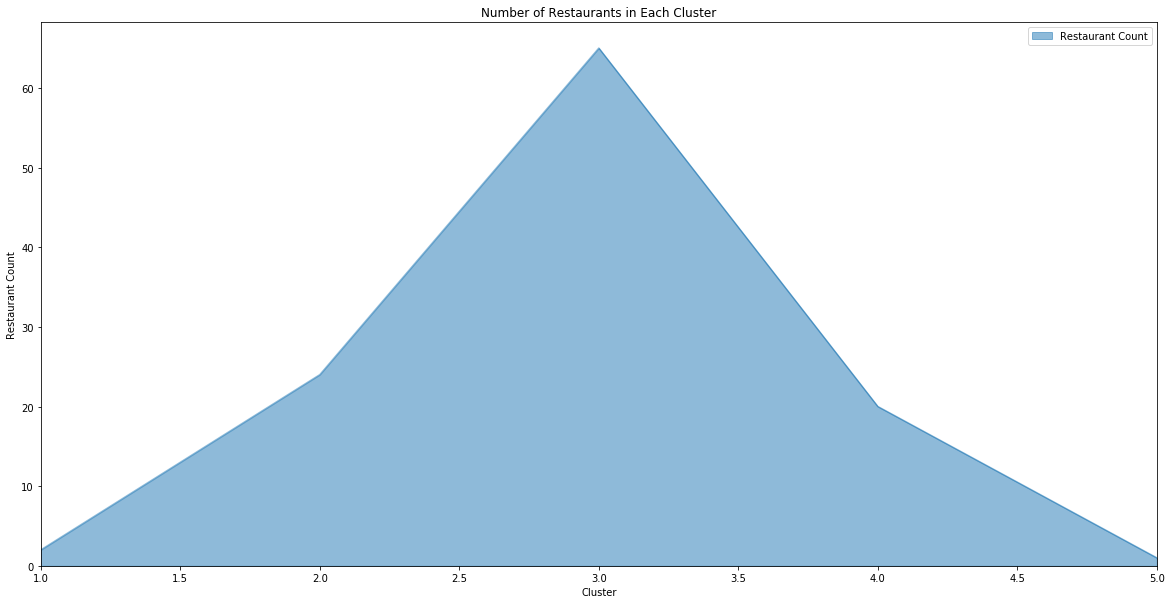

In [99]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
dfplot.index = dfplot.index.map(int)
dfplot.plot(kind='area', 
             alpha=0.5, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Number of Restaurants in Each Cluster')
plt.ylabel('Restaurant Count')
plt.xlabel('Cluster')

plt.show()


This plot says that there are more than 60 restaurants in cluster 3. So as per my analysis the area where one can place their restaurant is **Cluster 3**